# EDA

### Carga de Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cargamos el dataset limpio
df = pd.read_csv('../../dataset_limpio.csv')

# Convertimos las columnas 'popularity' y 'revenue' a numéricas
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

### 1. Nube de palabras de los títulos de las películas

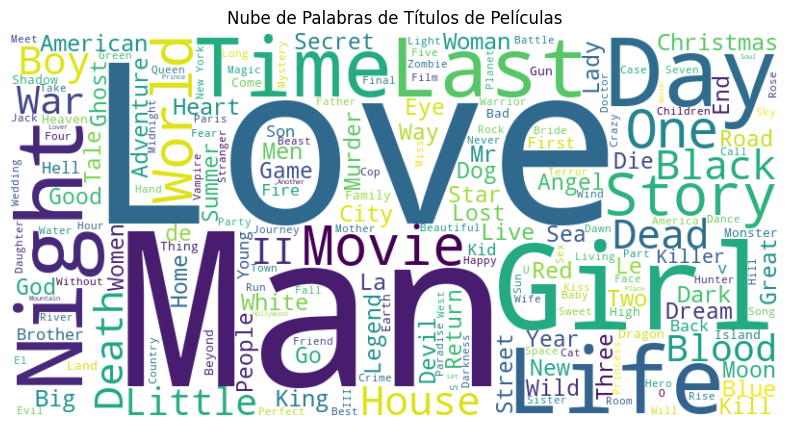

In [3]:
all_titles = ' '.join(df['title'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Películas')
plt.show()

##### Se combinan todos los títulos de películas en una sola cadena de texto. Luego, se genera y visualiza una nube de palabras con los títulos de las películas.

### 2. Gráfico de barras de las 10 películas con mayor recaudación

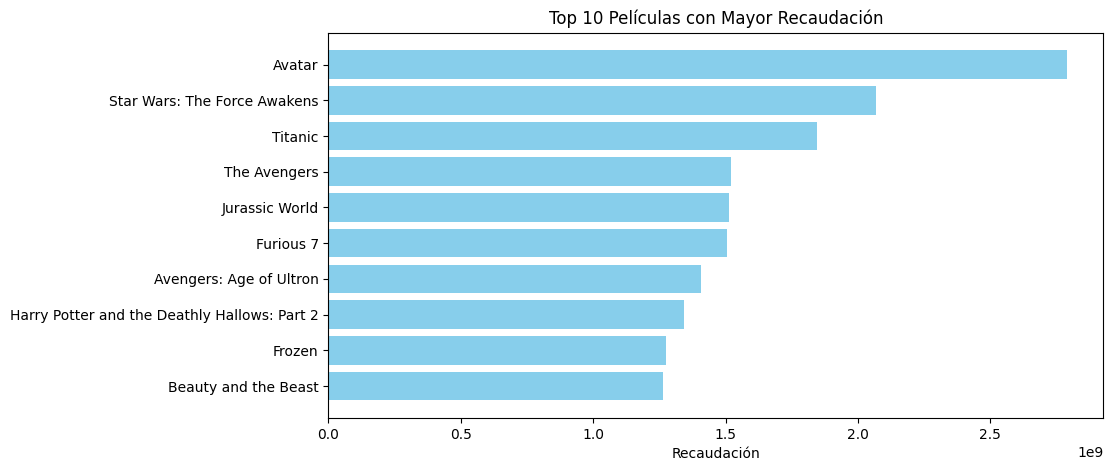

In [4]:
top_10_revenue = df.nlargest(10, 'revenue')
plt.figure(figsize=(10, 5))
plt.barh(top_10_revenue['title'], top_10_revenue['revenue'], color='skyblue')
plt.xlabel('Recaudación')
plt.title('Top 10 Películas con Mayor Recaudación')
plt.gca().invert_yaxis()
plt.show()

##### Se seleccionan las 10 películas con mayor recaudación. Luego, se crea un gráfico de barras horizontal mostrando las películas y su recaudación.

### 3. Gráfico de barras de las 10 películas con mejor popularidad

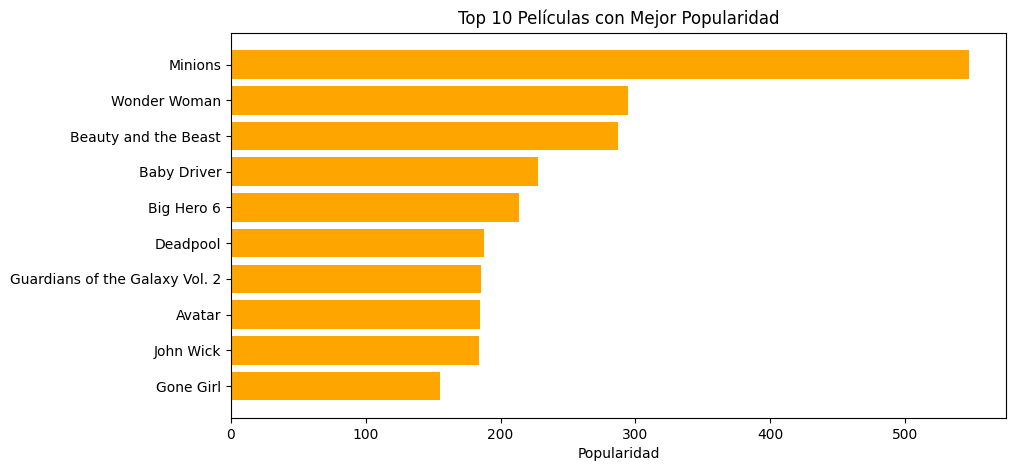

In [5]:
top_10_popularity = df.nlargest(10, 'popularity')
plt.figure(figsize=(10, 5))
plt.barh(top_10_popularity['title'], top_10_popularity['popularity'], color='orange')
plt.xlabel('Popularidad')
plt.title('Top 10 Películas con Mejor Popularidad')
plt.gca().invert_yaxis()
plt.show()

##### Se seleccionan las 10 películas con mejor popularidad. Después se crea un gráfico de barras horizontal mostrando las películas y su popularidad.

### 4. Gráfico de barras de la cantidad de filmaciones por día de la semana

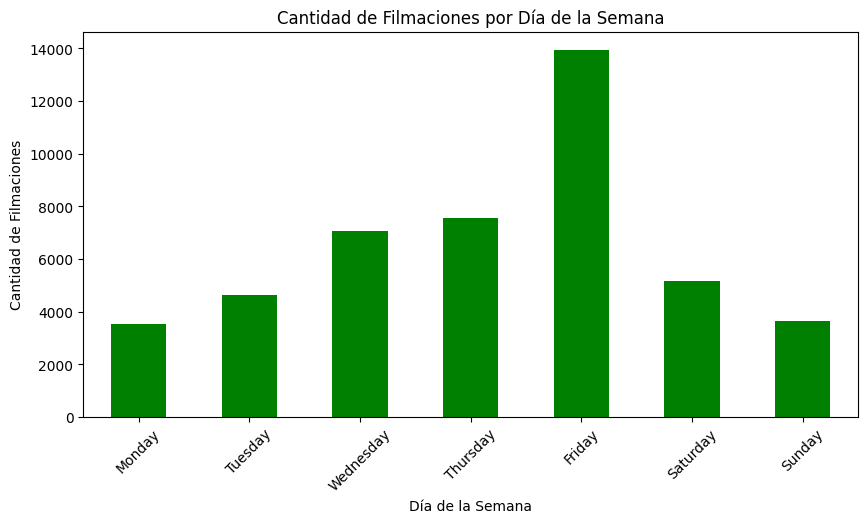

In [6]:
df['release_day'] = pd.to_datetime(df['release_date'], errors='coerce').dt.day_name()
filmaciones_por_dia = df['release_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 5))
filmaciones_por_dia.plot(kind='bar', color='green')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Filmaciones')
plt.title('Cantidad de Filmaciones por Día de la Semana')
plt.xticks(rotation=45)
plt.show()


##### Primero se convierte la columna release_date a tipo datetime y se obtiene el nombre del día de la semana.
##### Luego se cuentan las filmaciones por cada día de la semana.
##### Luego finaliza en crear un gráfico de barras mostrando la cantidad de filmaciones por día de la semana.

### 5. Gráfico de barras de la cantidad de filmaciones por mes

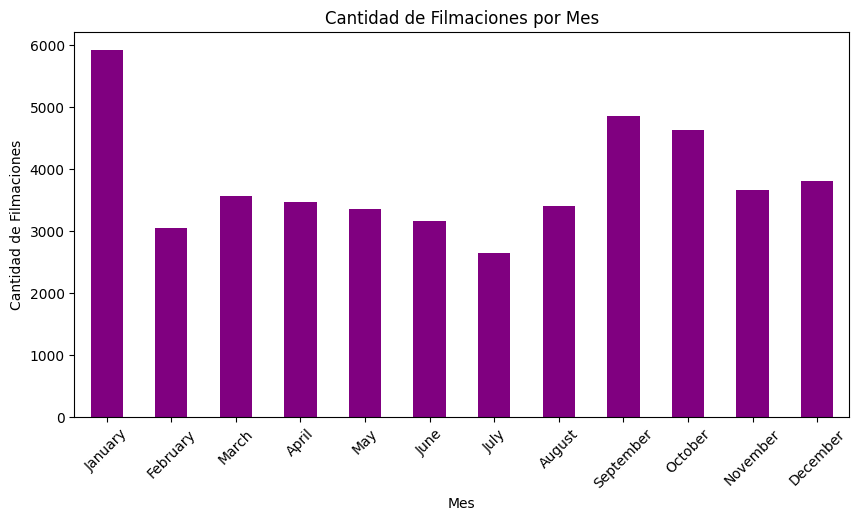

In [7]:
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month_name()
filmaciones_por_mes = df['release_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(10, 5))
filmaciones_por_mes.plot(kind='bar', color='purple')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Filmaciones')
plt.title('Cantidad de Filmaciones por Mes')
plt.xticks(rotation=45)
plt.show()

##### Se convierte la columna release_date a tipo datetime y se obtiene el nombre del mes.
##### Luego se cuentan las filmaciones por cada mes.
##### Por último se crea un gráfico de barras mostrando la cantidad de filmaciones por mes.

#### Este EDA fue realizado en VSC